In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [44]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50

multi-class clasification dataset


In [47]:
from sklearn.datasets import load_iris

In [48]:
iris = load_iris()
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [49]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [50]:
print(iris.data_module)

sklearn.datasets.data


In [51]:
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [52]:
print (iris.filename)

iris.csv


In [53]:
print (iris.frame)

None


In [54]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [55]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [56]:
flower_type = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [57]:
# print(iris.data)

In [58]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
iris_df["species"] = iris.target

In [60]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [62]:
iris_df["species"].value_counts()/len(iris_df)*100

0    33.333333
1    33.333333
2    33.333333
Name: species, dtype: float64

<AxesSubplot:xlabel='species', ylabel='count'>

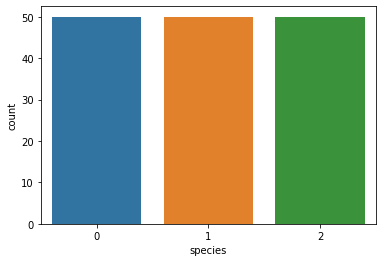

In [63]:
sns.countplot(x = iris_df["species"])

# model trainig 

In [64]:
x = iris_df.drop("species" , axis = 1)
y = iris_df["species"]


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25 , random_state= 3 ,stratify= y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [66]:
model_logi = LogisticRegression(max_iter=120)
model_logi.fit(x_train,y_train)

LogisticRegression(max_iter=120)

# Model Evaluation

In [67]:
y_pred = model_logi.predict(x_train)
y_pred[:5]

array([0, 1, 0, 2, 0])

In [68]:
y_train[:5]

40     0
80     1
13     0
108    2
22     0
Name: species, dtype: int32

In [69]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score

In [70]:
accuracy_score(y_train ,y_pred)

0.9821428571428571

In [71]:
confusion_matrix(y_train,y_pred)

array([[37,  0,  0],
       [ 0, 37,  1],
       [ 0,  1, 36]], dtype=int64)

In [72]:
cl_report = classification_report(y_train ,y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.97      0.97        38
           2       0.97      0.97      0.97        37

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



In [73]:
from sklearn.metrics import multilabel_confusion_matrix

In [74]:
multilabel_confusion_matrix(y_train ,y_pred)

array([[[75,  0],
        [ 0, 37]],

       [[73,  1],
        [ 1, 37]],

       [[74,  1],
        [ 1, 36]]], dtype=int64)

In [75]:
# Model_evaluation by creating function

def mod_eval(model_name ,x, y ):
    y_pred = model_name.predict(x)
    
    acc_score = accuracy_score(y,y_pred)
    print (f"accuracy score = \n{acc_score}")
    print ("*"*30)
    conf_metrix = confusion_matrix(y,y_pred)
    print (f"confusion metrix = \n{conf_metrix}")
    print ("*"*30)
    cl_report = classification_report(y,y_pred)
    print (f"classif report = \n{cl_report}")
    print ("*"*30)
    ml_cn = multilabel_confusion_matrix(y,y_pred)
    print(f"Class wise Confusion matrix = \n {ml_cn}")
    
    return "Model Evaluate"

In [76]:
mod_eval(model_logi ,x_train, y_train )

accuracy score = 
0.9821428571428571
******************************
confusion metrix = 
[[37  0  0]
 [ 0 37  1]
 [ 0  1 36]]
******************************
classif report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.97      0.97        38
           2       0.97      0.97      0.97        37

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112

******************************
Class wise Confusion matrix = 
 [[[75  0]
  [ 0 37]]

 [[73  1]
  [ 1 37]]

 [[74  1]
  [ 1 36]]]


'Model Evaluate'

In [77]:
mod_eval(model_logi ,x_test, y_test )


accuracy score = 
0.9210526315789473
******************************
confusion metrix = 
[[13  0  0]
 [ 0 10  2]
 [ 0  1 12]]
******************************
classif report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      0.83      0.87        12
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

******************************
Class wise Confusion matrix = 
 [[[25  0]
  [ 0 13]]

 [[25  1]
  [ 2 10]]

 [[23  2]
  [ 1 12]]]


'Model Evaluate'

<!-- Bias & Variance  -->

Low Bias & Low Variance

So it is a Generalized / Best Fit Model

# UserTest Function

In [97]:
model_logi.predict_proba(x_test[1:3])

array([[1.60676394e-01, 8.35141132e-01, 4.18247424e-03],
       [9.74314609e-01, 2.56852454e-02, 1.45226592e-07]])

In [96]:
model_logi.predict(x_test[1:3])

array([1, 0])

In [98]:
# model_logi.predict()
x_test[1:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
57,4.9,2.4,3.3,1.0
8,4.4,2.9,1.4,0.2


In [85]:
flower_type

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [112]:
sl = 4.4
sw = 2.9
pl = 1.4
pw = 0.2

data = [sl,sw,pl,pw]
predict_flower = model_logi.predict([data])

if predict_flower ==0:
    print("Setosa")
    
if predict_flower ==1:
    print("Versicolor")   
    
if predict_flower ==2:
    print("Virginica")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 4 features as input.

In [106]:
import pickle
import json

In [107]:
with open("iris_logistic_model.pkl","wb") as file:
    pickle.dump(model_logi,file)

In [110]:
with open("flower_type.json","w") as flower_file:
    json.dump(flower_type,flower_file)

In [111]:
from flask import Flask ,render_template

In [ ]:
http://127.0.0.1:5000

In [ ]:
python get.py